
# Analyzing Intimacy in *The Twilight Saga* by Stephanie Meyer

## Hannah Shlesinger

15 August 2021

Introduction to Computational Literary Analysis

Digital Humanities 150C

Instructor: Jonathan Reeve




## Introduction

Since its publication in 2005, *The Twilight Saga* many have praised and disparaged the romance between high schooler Bella and her swoony Vampire boyfriend Edward. Over time, the book series and movie franchise has been criticized for its many flaws, namely the unhealthy relationship between Edward and Bella, and general misogyny, sexism, and racism. Yet, despite its flaws, many readers think of the series with a degree of fondness. While it would be a worthy endeavor to take any one of its flaws and blow it up for examination, I am not going to be directing my focus on its flaws. Instead, I am interested in unpacking exactly how *Twilight* connects and resonates with its readers. 

One theory discussed in the study of Young Adult Literature scholarship is the notion of narrative intimacy between young adolescent readers and narrators. In her book *Reading Like a Girl: Narrative Intimacy in Contemporary Young Adult Literature,* Sara K. Day describes narrative intimacy as "a desire on the part of many adolescent women readers to identify so strongly with characters that the line between fictional story and real reading experience can be blurred or disregarded entirely" (3). Day breaks down the typical methods authors use to establish this intimacy between their narrators and intended readers. She emphasizes the importance of writing in first person perspective and present tense to create a sense immediacy and full reader immersion into the text. Furthermore, narrators will often disclose their deepest secrets and confessions to their readers, sharing their feelings with the reader before they confessing them to any other characters in the novel (4). This is executed most directly in epistolary form or novels that incorporate some sort of diary fiction. 

*The Twilight Saga* practices a few of these methods like narrating the story in first person point of view. Yet, how exactly can one quantify and calculate more abstract moments of narrative intimacy between Bella and her readers? Using computational methods, I will attempt to quantify and compute the moments of intimacy in *The Twilight Saga.* Specifically, I will be looking at the emotional and physical language in order to see how emotional each novel is and how these emotions are being described in different contexts.  


# Import Libraries

In [1]:
#get corpus
import requests

#import libraries
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import seaborn as sns

import collections
from collections import Counter

In [2]:
lemmatizer = nltk.stem.WordNetLemmatizer()

# Import the corpus

I got most of the novels in the series from The Internet Archive. After downloading the texts, I uploaded the files to my [GitHub](https://github.com/hannahcshlesinger/twilight) repository so that this notebook will be accessible to others interested in adding on or altering the code for their own projects and research. I wrote a function to grab the texts and assigned them to variables. 

In [3]:
#make a function to grab all the texts from the github repo
def getTexts(link):
    response = requests.get(link)
    return response.text

In [4]:
twilight = getTexts('https://raw.githubusercontent.com/hannahcshlesinger/twilight/main/texts/twilight.txt')
new_moon = getTexts('https://raw.githubusercontent.com/hannahcshlesinger/twilight/main/texts/New_Moon.txt')
eclipse = getTexts('https://raw.githubusercontent.com/hannahcshlesinger/twilight/main/texts/Eclipse.txt')
breaking_dawn = getTexts('https://raw.githubusercontent.com/hannahcshlesinger/twilight/main/texts/breaking_dawn.txt')
 

#make a list of novel names and of the text 
novel_titles = ["twilight", "new_moon", "eclipse", "breaking_dawn"]
novel_texts = [twilight, new_moon, eclipse, breaking_dawn]

#make a dictionary of all the novel names with their text
novelDict = {twilight, new_moon, eclipse, breaking_dawn}

In [5]:
novelDict = {novel: text for novel, text in zip(novel_titles, novel_texts)}

# Pre-Process the text

Before running the text through analysis, I wrote a function to output only alphabetized tokens of each texts. 

In [6]:
#pre-process the text
    #lowercase
    #tokenize
    #get only alphabetical tokens 
    
def getAlphaTokens(text):
    lowerTokens = nltk.word_tokenize(text.lower())
    alphaTokens = [token for token in lowerTokens if token.isalpha()]
    return alphaTokens

In [7]:
twilight_tokens = getAlphaTokens(twilight)
new_moon_tokens = getAlphaTokens(new_moon)
eclipse_tokens = getAlphaTokens(eclipse)
breaking_dawn_tokens = getAlphaTokens(breaking_dawn)

In [8]:
allTokens = twilight_tokens + new_moon_tokens + eclipse_tokens + breaking_dawn_tokens

# Which novel is the most emotional?

How can we quantify how emotional a novel is? For this analysis, I am defining the most emotional novel as the novel with the highest frequency of emotion words. I used WordNet to extract a large tree of emotion words. While WordNet is imperfect, it does provide a generally wide net of emotions to use to test the novels. 

In [9]:
emotion = wn.synsets('emotion')[0]

In [10]:
def getHyponym(word):
    return word.hyponyms()

In [11]:
emotionTree = emotion.tree(rel=getHyponym)

In [12]:
emotionTree[1]

[Synset('anger.n.01'),
 [Synset('annoyance.n.02'),
  [Synset('aggravation.n.01')],
  [Synset('displeasure.n.01')],
  [Synset('frustration.n.03')],
  [Synset('harassment.n.01')],
  [Synset('pique.n.02')]],
 [Synset('bad_temper.n.01'),
  [Synset('fit.n.01')],
  [Synset('irascibility.n.01')]],
 [Synset('dander.n.02')],
 [Synset('fury.n.01'), [Synset('lividity.n.01')], [Synset('wrath.n.01')]],
 [Synset('huffiness.n.01')],
 [Synset('indignation.n.01'), [Synset('dudgeon.n.01')]],
 [Synset('infuriation.n.01')],
 [Synset('umbrage.n.01')]]

In [13]:
def isSynset(node):
    return type(node) == nltk.corpus.reader.wordnet.Synset

In [14]:
def getLemmas(tree):
    allLemmas = []
    for node in tree:
        if isSynset(node):
            nodeLemmas = node.lemma_names()
            for lemma in nodeLemmas:
                allLemmas.append(lemma)
        else:
            nodeLemmas = getLemmas(node)
            for lemma in nodeLemmas:
                allLemmas.append(lemma)
    return allLemmas
           

In [15]:
emotionLemmas = getLemmas(emotionTree)

### Removing select words

As mentioned, WordNet isn't perfect and can't always pick words that match the proper context. Below are some words that appeared in high frequency as emotion words that I manually removed to get more accurate results. 

In [16]:
emotionLemmas.remove('fit')
emotionLemmas.remove('venom')
emotionLemmas.remove('spirit')
emotionLemmas.remove('scene')

In [17]:
def getEmotions(text):
    tokens = getAlphaTokens(text)
    emotions = [token for token in tokens if token in emotionLemmas]
    return emotions

In [18]:
def emotionFreq(text):
    emotion_words = len(getEmotions(text))
    total_words = len(nltk.word_tokenize(text))
    emotion_freq = emotion_words / total_words
    return emotion_freq
    

In [19]:
emotionDict = {nov: emotionFreq(novelDict[nov]) for nov in novelDict}

In [20]:
emotionDict

{'twilight': 0.0027253437502027787,
 'new_moon': 0.0026919975333238462,
 'eclipse': 0.003045320323533188,
 'breaking_dawn': 0.0023449565146712184}

# *Eclipse* is the most emotional novel in *The Twilight Saga*
To start my analysis, I decided to see how the novels compare to each other. Being familiar with the texts myself, I assumed *Breaking Dawn* would be the most emotional novel in the whole series. After running the  frequency functions, I was surprised to see that *Eclipse* had the highest frequency of emotion words. Following my definition, this places *Eclipse* as the most emotional novel in the series. When thinking back on the plot, I recalled a few plot points that might be related to the increase in emotions. For one, the building love triangle in the series between Bella, Edward, and her old werewolf friend Jacob comes to a head. Bella realizes she loves both of them, but after kissing Jacob, she ultimately turns him away in favor of accepting a marriage proposal from Edward. Furthermore, in book series, authors will often drive up conflict and tension in the penultimate novel in order to serve up a more satisfying conclusion to their work. So, structurally, there is also a functional reason to have emotions at a peak in the third novel. 

# What are the most frequent emotions in *The Twilight Saga*?

Now that I've established *Eclipse* as the most emotional novel in the series, it is time to see which emotion words appear in the highest frequency throughout the text. To do so, I wrote a function to count the number of times an emotion word is used in each text and return the top eight most common words. I then wrote a function to take the emotion word count, calculate the frequency of the emotion words with proportion to the rest of the text and added this information to a data frame. After I ran this function for each novel, I concatenated the data frames together and graphed the results. 


In [26]:
counted = collections.Counter

def emotionCount(text):
    count = counted(getEmotions(text)).most_common(8)
    return count

In [27]:
def makeDF(text, novelTitle):
    total_words = len(nltk.word_tokenize(text))
    df = pd.DataFrame(emotionCount(text), columns = ["Word", "Count"])
    df['Frequency'] = (df["Count"] / total_words)
    df['Novel'] = novelTitle
    return df

In [28]:
twilight_df = makeDF(twilight, "Twilight")
new_moon_df = makeDF(new_moon, "New Moon")
eclipse_df = makeDF(eclipse, "Eclipse")
breaking_dawn_df = makeDF(breaking_dawn, "Breaking Dawn")


In [29]:
#combine the dataframes
novels_df = pd.concat([twilight_df, new_moon_df, eclipse_df, breaking_dawn_df])

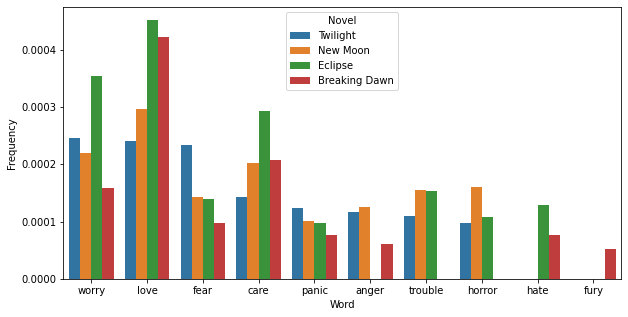

In [31]:
plt.figure(figsize=(10,5))
emotions_graph = sns.barplot(y = 'Frequency', 
                               x = 'Word',
                               hue = 'Novel',
                               data = novels_df,
                               orient="v",
                              palette=None,)
emotions_graph.figure.savefig('emotions_graph.jpg')

# High Frequency of Negative Emotions

From the graph, it becomes immediately apparent that the dominant emotions in *The Twilight Saga* are negative. This reflects findings by other scholars who have run sentiment analysis on the series and have found the whole series, not just the emotion words, to score as predominantly negative ("Sentiment Analysis of Twilight"). The specific negative emotions like "fear" and "horror" may just be a reflection of the Paranormal subgenre. Bella is often in situations where her life is at risk, so some of these feelings make sense. However, when trying to think about how these negative emotions connect back to the theory of narrative intimacy, it is important to remember that bonding between the reader and narrator occurs during moments of heightened intensity where the narrator is likely to confess information to the reader that they keep hidden from other characters in the novel. Put another way, there may be a correlation between secrets and negative emotions which would indicate a high degree of intimacy. 

Furthermore, it is useful to remember that Meyer's reader base was predominantly young female teenagers. Many teenagers would relate to the dreary fear and heartbreak that Bella experiences throughout the novel. Young readers can fully insert themselves into the text and pull themselves out when they close the book, experiencing a cathartic emotional release. 

# Calculating other forms of intimacy

Beyond emotionally intense moments, I am interested in looking at moments of heightened sensual or physical feeling. To do so, I made my own list of 'intimacy' words since WordNet couldn't offer as many relevant terms. To build my list, I brainstormed from the Day reading and generally researched sensual and intimate word lists online (“Sensual Word Menu"). I found a lot of lists online intended for Romance and Erotica writers to use in physically intimate scenes. After building my list, I ran the same functions and processes to calculate which intimacy-related words showed up in the highest frequency for each novel.

In [171]:
intimate_words = ['sex', 'romantic', 'romance','skin','play','sexy', 'intimate', 'kiss',
                  'touch', 'feel', 'close', 'hold', 'moan', 'gasp', 'gasped', 'grasp'
                  'groan','secret', 'hug', 'lips', 'bed', 'lay', 'soothe', 'hug', 'stroke', 'stroked',
                  'handle', 'trailed', 'worship', 'rub', 'grab', 'trace', 'brush','pull',
                  'cheek', 'trust', 'trused', 'kiss', 'kissed', 'whisper', 'whispered', 
                  'cry', 'cried', 'whimpered', 'hushed', 'quiet', 'confess', 'confessed' 'chest', 'arms',
                 'utter', 'uttered','erotic', 'face', 'sigh', 'sighed', 'shy', 'neck', 'naked',
                     'seduced', 'seduce', 'blush', 'blushed']


In [172]:
def getIntimacy(text):
    tokens = getAlphaTokens(text)
    intimacy = [token for token in tokens if token in intimate_words]
    return intimacy

In [173]:
def intimateFreq(text):
    intimate_words = len(getIntimacy(text))
    total_words = len(nltk.word_tokenize(text))
    intimate_freq = intimate_words / total_words
    return intimate_freq

In [174]:
intimateDict = {nov: intimateFreq(novelDict[nov]) for nov in novelDict}
intimateDict

{'twilight': 0.0075011842267486,
 'new_moon': 0.008467340259000996,
 'eclipse': 0.009130825523173706,
 'breaking_dawn': 0.007388441843452816}

# *Eclipse* is the most intimate novel

Based on the same analysis, *Eclipse* has the highest frequency of intimate words. This should be taken with a grain of salt since there is perhaps a good amount of intimacy words that overlap with words from the emotions list. What's interesting is that in terms of emotions, *Breaking Dawn* ranks as the least emotional novel after *Twilight*. It makes sense that *Twilight* would rank lower since Edward and Bella are only getting to know each other for the first time at the beginning of the series. What shocked me was that *Breaking Dawn* ranks at the bottom. *Breaking Dawn* features Edward and Bella's honeymoon vacation to Island Esme and their first sexually intimate scenes. However, Meyer often uses a 'fade to black' technique instead of explicitly describing these scenes, so this could explain the lower frequency. 

In [175]:
def intimacyCount(text):
    count = counted(getIntimacy(text)).most_common(10)
    return count

In [176]:
def makeIntimacyDF(text, novelTitle):
    total_words = len(nltk.word_tokenize(text))
    df = pd.DataFrame(intimacyCount(text), columns = ["Word", "Count"])
    df['Frequency'] = (df["Count"] / total_words)
    df['Novel'] = novelTitle
    return df

In [177]:
twilight_df = makeIntimacyDF(twilight, "Twilight")
new_moon_df = makeIntimacyDF(new_moon, "New Moon")
eclipse_df = makeIntimacyDF(eclipse, "Eclipse")
breaking_dawn_df = makeIntimacyDF(breaking_dawn, "Breaking Dawn")

In [178]:
novels_intimacydf = pd.concat([twilight_df, new_moon_df, eclipse_df, breaking_dawn_df])

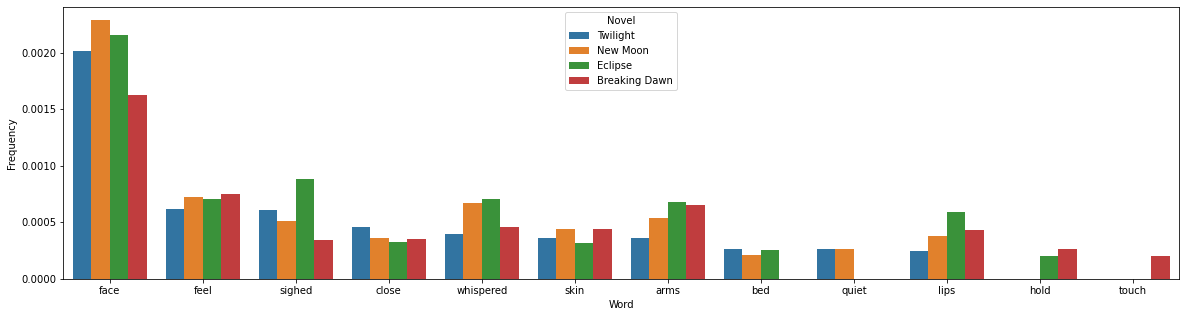

In [179]:
plt.figure(figsize=(20,5))
emotions_graph = sns.barplot(y = 'Frequency', 
                               x = 'Word',
                               hue = 'Novel',
                               data = novels_intimacydf,
                               orient="v",
                              palette=None,)
emotions_graph.figure.savefig('intimacy_graph.jpg')

# `Face` your `Feel`ings

Immediately apparent from the results of the graph is the high frequency of the word 'face' and other body parts. Since a lot of the words I included in my intimate words list are common body parts mentioned in intimate scenes, this isn't incredibly surprising. This may be more of a reflection of the words I selected rather than a sign of how intimacy is quantified within the text. In addition, since I selectively created my own word list, I did not divide between parts of speech. It might be that Meyer uses nouns more than she uses verbs in her text, so comparing these individual words to the overall tokens in a text does separate a lot of the words from the context that their part of speech places them in. 

However, when taking the holistic approach, it does still tell us a lot that 'face' and 'feel' are the most frequent intimate words across all of the texts. If Bella is often discussing how she feels in her internal monologue then those uses of the word could be considered instances of confession between the narrator and the reader. While 'face' can be used as a verb, I predict that 'face' is often used in a more intimate context. To look more at the context at some of these words, I ran concordances and functions to learn more.  

# Contextualizing intimacy words

In [40]:
def getText(text):
    nltk_text = nltk.Text(allTokens)
    return nltk_text

In [41]:
def getConcordance(word):
    concordance = nltk.Text(allTokens).concordance(word, lines=20)
    return concordance

In [42]:
def dispersionPlot(word):
    nltk.Text(allTokens).dispersion_plot(word)

In [145]:
getConcordance('face')

Displaying 20 of 1515 matches:
s allowed to call him charlie to his face i had only a few bags most of my ari
ter the day of travel i looked at my face in the mirror as i brushed through m
d stepped out of the truck i kept my face pulled back into my hood as i walked
 mother is part albino he studied my face apprehensively and i sighed it looke
e or painted by an old master as the face of an angel it was hard to decide wh
 in that brief flash of a glance his face held nothing of interest it was as i
mile then i glanced at him again his face was turned away but i thought his ch
with the strangest expression on his face it was hostile furious i looked away
e edge of his chair and averting his face like he smelled something bad incons
red the biology room the look on his face must have been about another aggrava
 the desk swirling my hair around my face the girl who came in merely stepped 
 he turned slowly to glare at me his face was absurdly handsome with piercing 
he door i went meekly

# His perfect face 

Even for a concordance alone, it is clear that 'face' is often used in the context of Bella either describing her face or Edward's face. Notable is the way Bella often describes Edward as having an "absurdly handsome," "perfect," "dazzling," "face of an angel." These are only the first twenty results of 1515 matches, but I suspect many of the following descriptions would follow a similar trend. In "The Anti-Feminist Character of Bella Swan, or Why the Twilight Saga is Regressive," Reni Eddo-Lodge critcizes the power imbalance between Edward and Bella with regard to physical description. Edward is often described as perfect and male while Bella is imperfect, flawed, and female. Eddo-Lodge draws specific attention to the language of idolisation and Christian undertones, the result of which they call "an inevitable, irreconcilable inequality." 

Yet, despite its problematic and regressive nature, when trying to think about the novel from a narrative intimacy framework, I might suggest that reading a narrator who is situated as 'the worshipper' might be more relatable to readers than reading from the perspective of 'the worshipped.' If Bella Swan represents the worst most reductive female protagonist *and* she still gets a happy ending, it might be easier for readers to connect with her rather than Edward, the perfect vampire boyfriend who remains perfect throughout the series. Alicia Otano Unzue similarly argues that the problematic behaviors in the series are functionally reduced to minor details when the readers are "eclipsed by an exaltation of feelings" (22). 

In [103]:
getConcordance('feel')

Displaying 20 of 539 matches:
my window in the morning and i could feel the claustrophobia creeping up on me
ore i donned my jacket which had the feel of a biohazard suit and headed out i
 see its size at first where was the feel of the institution i wondered nostal
g a purple which immediately made me feel overdressed the woman looked up can 
nd faces i now remembered i began to feel like i was treading water instead of
 and he looked relieved he seemed to feel awkward standing in the kitchen doin
ch i ever heard charlie make he must feel strongly about whatever people were 
 to work on my math homework i could feel a tradition in the making that night
mfortable than i had thought i would feel by this point more comfortable than 
fortable than i had ever expected to feel here when we walked out of class the
 my ears were hot i had no reason to feel i reminded myself i had done anythin
 you hungry jessica asked actually i feel a little sick i said my eyes still o
me with him now but co

# How `I` feel

From the first 20 results of the concordance I ran above, my theory that 'feel' was being used to discuss emotions was challenged. Many of the sentences seem to describe not emotions but physical sensations. Even so, it is often Bella who is the one using these words as opposed to her describing how others around her feel. The sentence "he seemed to feel" refers not to Edward but Charlie, Bella's father. Similarly the sentence match with "you feel" is a fragment of dialogue directed at Bella. 

In [157]:
getConcordance('touch')

Displaying 20 of 124 matches:
m my mother so that we could stay in touch easily the rocking chair from my bab
med like he was being careful not to touch my skin again i took the most fleeti
his league were spheres that did not touch so i should be at all anxious to see
re of edward sitting close enough to touch as distant as if he were merely an i
 reached forward without thinking to touch his folded hands but he slid them aw
he pulled back slightly once more to touch the back of his hand shyly with my f
 me to the door still careful not to touch me i remembered what jessica had sai
hat little distance to reach out and touch him but i was afraid he would like m
as a crazy impulse to reach over and touch him to stroke his perfect face just 
x either the overpowering craving to touch him also refused to fade and i crush
 fiercely beautiful that the ache to touch him flared as strong as before my go
h my hand across the short space and touch his cold skin as yesterday i leaned 
pped it to

# Touch & The Body

Running a concordance on 'touch' wasn't as fruitful although it did remind me to add 'skin' to the intimate words list. It's also interesting to note, at least in the inital matches, that a lot of the touching is coming from Bella. She is the one reaching out to touch Edward as opposed to him touching her. I decided to look more into language relating to the body. When I ran a four-gram, I found a lot of the common distinct phrases throughout the corpus related to the body as well. 

In [59]:
def commonNgrams(text, n):
    tokens = getAlphaTokens(text)
    stop_words = set(stopwords.words('english'))
    no_stop_tokens = [token for token in tokens if token not in stop_words]
    ngrams = nltk.ngrams(no_stop_tokens, n)
    ngramsList = list(ngrams)
    return Counter(ngramsList).most_common(4)

In [62]:
fivegramDict = {nov: commonNgrams(novelDict[nov], 4) for nov in novelDict}

In [63]:
fivegramDict

{'twilight': [(('believe', 'would', 'give', 'easily'), 2),
  (('comer', 'eye', 'leaning', 'away'), 2),
  (('turned', 'key', 'engine', 'roared'), 2),
  (('key', 'engine', 'roared', 'life'), 2)],
 'new_moon': [(('shook', 'head', 'back', 'forth'), 4),
  (('folded', 'arms', 'across', 'chest'), 4),
  (('arm', 'around', 'waist', 'pulled'), 3),
  (('well', 'going', 'live', 'without'), 2)],
 'eclipse': [(('folded', 'arms', 'across', 'chest'), 6),
  (('lips', 'pulled', 'back', 'teeth'), 5),
  (('raised', 'one', 'eyebrow', 'knew'), 3),
  (('pacing', 'back', 'forth', 'across'), 3)],
 'breaking_dawn': [(('one', 'hundred', 'percent', 'sure'), 4),
  (('tick', 'tock', 'tick', 'tock'), 4),
  (('hachette', 'book', 'group', 'usa'), 3),
  (('eyes', 'rolled', 'back', 'head'), 3)]}

# Who is touching who?
Finally, I made some functions to look at pronouns and posessive pronouns in sentences with the different forms of 'touch' and 'feel.' The results weren't super informative, but I thought I'd include them because they could be a good building block for later investigation. 

In [235]:
def getPOS(text):
    tokens = getAlphaTokens(text)
    pos = nltk.pos_tag(tokens)
    return pos

In [234]:
def getTouch(wordList, text):
    tag1, word2, tag3 = wordList
    words = []
    for i, wordTagPair in enumerate(text):
        if i == len(text) - 3:
            break
        word, tag = wordTagPair
        secondWord, secondTag = text[i+1]
        thirdWord, thirdTag = text[i+2]
        if tag == tag1:
            if secondWord == word2:
                if thirdTag == tag3:
                    words.append([word, secondWord, thirdWord])
    return words

In [236]:
felt = [getTouch(['PRP', 'felt', 'PRP$'], getPOS(text)) for text in novel_texts]
felt

[[], [], [['he', 'felt', 'my']], []]

In [238]:
feel = [getTouch(['PRP', 'feel', 'PRP'], getPOS(text)) for text in novel_texts]
feel

[[['you', 'feel', 'he']],
 [],
 [['you', 'feel', 'you'],
  ['you', 'feel', 'he'],
  ['you', 'feel', 'you'],
  ['you', 'feel', 'it']],
 [['me', 'feel', 'we'], ['they', 'feel', 'it']]]

In [239]:
touched = [getTouch(['PRP', 'touched', 'PRP$'], getPOS(text)) for text in novel_texts]
touched

[[['he', 'touched', 'my']],
 [],
 [['they', 'touched', 'my'],
  ['he', 'touched', 'his'],
  ['he', 'touched', 'my'],
  ['he', 'touched', 'my']],
 [['he', 'touched', 'my'],
  ['he', 'touched', 'my'],
  ['he', 'touched', 'my'],
  ['she', 'touched', 'my'],
  ['she', 'touched', 'my'],
  ['he', 'touched', 'my'],
  ['it', 'touched', 'my']]]

# Conclusions

The analysis I ran on *The Twilight Saga* novels reinforces the notions that the novels are full of negative emotions and supports previous scholars' work suggesting that the novels are negatively scored overall. The process revealed that trying to quantify and abstract ideas like emotions or intimacy is difficult or at least incredibly subjective. The process uncovered a possible pattern in the way the body and individual body parts are mentioned and described. An analysis on the body alone could be interesting and pursued in further investigations. Another point of interest was the Biblical language used to create a 'worshipper' vs 'worshiped' binary in the text. It would be interesting to see if this type of language appears in other Young Adult Romances or more specifically in other Paranormal Romances. How Christian are these romances and can that be calculated. 

These are all questions worthy of further investigation. However, that is where I end my own investigation within the scope of this course. I have published these findings on GitHub so that any who are curious or interested in running their own analysis on the corpus has the ability to do so. 


# Works Cited

Arnold, Claire, and Brendan Mobley. “Vampires, Plots, and Interactivity - Oh My!” Vampires, Plots, and Interactivity - Oh My! · Reed Data Science Spring 
2020, Reed College, 27 May 2020, www.reed.edu/math/241/2020/05/27/vampires-plots-and-interactivity-oh-my/. 

Day, Sara K. Reading Like a Girl : Narrative Intimacy in Contemporary American Young Adult Literature, University Press of Mississippi, 2013. 
https://search-library-berkeley-edu.libproxy.berkeley.edu/discovery/openurl?institution=01UCS_BER&vid=01UCS_BER:UCB&isbn=9781617038112&genre=book&eisbn=9781621039600&title=Reading%20Like%20a%20Girl&sid=jstor:jstor
    
Eddo-Lodge, Renni. “The Anti-Feminist Character of Bella Swan,  or Why the Twilight Saga Is Regressive.” The Anti-Feminist Character of Bella Swan, or Why 
    the Twilight Saga Is Regressive, Kritikos V.10, January 2013, Intertheory Press, Jan. 2013, intertheory.org/eddo-lodge.htm.

“Sensual Word Menu.” Writers In The Storm Blog, 23 July 2012, writersinthestorm.wordpress.com/2011/06/10/sensual-word-menu-2/.

“Twilight: A Sentiment Analysis.” Sentiment Analysis of Twilight, Elon University, student.elon.edu/mmalone9/twilight/. 

Unzue, Alicia Otano. “Young Adult Pop Fiction: Empathy and the Twilight Series.” European Journal of American Studies, vol. 10, no. 2, 2015, 
    doi:10.4000/ejas.11141. 


 